# Центральная предельная теорема для арксинуса своими руками

In [1]:
# импортируем необходимые библиотеки

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

## Описание выбранного распределения

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Я выбрал Распределение арксинуса (https://en.wikipedia.org/wiki/Arcsine_distribution)

In [2]:
from scipy.stats import arcsine
arcs = sts.arcsine() 

Построим график функции распределения:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5d3b3e7512bc3365f11887a407d81dd46bd08b2e" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -1.838ex; width:21.57ex; height:5.176ex;" alt="{\displaystyle F(x)={\frac {2}{\pi }}\arcsin \left({\sqrt {x}}\right)}">

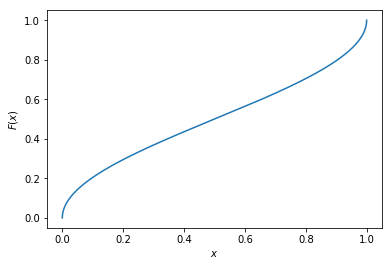

In [3]:
x = np.linspace(0,1,1000)
cdf = arcsine.cdf(x) # задал функции вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$');

расчитаем теоритеческую плотность вероятности для нормального распределения
при a ≤ x ≤ b,
плотность вероятности задаётся функцией <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/500fbdb509236e85253d8bb0bf7087c022e8fe63" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -3.171ex; width:20.479ex; height:6.509ex;" alt="{\displaystyle f(x)={\frac {1}{\pi {\sqrt {x(1-x)}}}}}">, для 0 < x < 1.

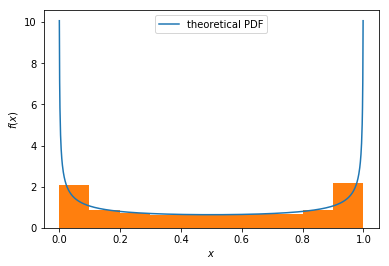

In [5]:
# генерация случайной выборки объема 1000 из распределения
sample = arcs.rvs(1000)

# расчет теоритеческой плотности вероятности для распределения (pdf)
# pdf - probability density function
pdf = arcs.pdf(x) 

# построил гистограмму выборки и наложил на нее pdf распределения арксинуса
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, normed = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best');

Далее расчитал параметры распределения _(все из той же ссылки в википедии)_

In [6]:
a = 0.5
b = 0.5
mediana = (a + b)/2
DX = 1/8. # дисперсия
EX = (a + b)/2 # матожидание

print 'a = b =', a, '\t', 'mediana =', mediana, '\t', 'Дисперсия =', DX, '\t', 'Матожидание =', EX

a = b = 0.5 	mediana = 0.5 	Дисперсия = 0.125 	Матожидание = 0.5


## Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

Используя информацию о среднем и дисперсии исходного распределения 
(её можно без труда найти в википедии и посчитана выше), 
посчитайте значения параметров нормальных распределений, которыми, 
согласно центральной предельной теореме, приближается распределение выборочных средних

### Распределение выборочных средних

Перейдем к следующему шагу и оценим распределение выборочных средних случайной величины.
Согласно Центральной Предельной Теореме выборочные средние  $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$
будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, 
где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.


Тогда в случае распределения арксинуса: $\mu = \mathbb{E}X  = 0.5$ - _математическое ожидание_, $\sigma = {\sqrt {\frac{0.125}{n}}}$ - среднеквадратическое отклонение для выборок $n$.

In [7]:
def generate_pdf(n): # сгенерируем выборочные средние по выборкам объема n
    array = [] # обозначим массив выборочных средних
    for i in range(1000): # цикл генерации случайных выборок количества n из функции
        sample = arcs.rvs(n) # генерация выборки
        Xi = sum(sample) / n # определение выборочного среднего (Xi)
        array.append(Xi) # добавляем в массив новое значение Xi
    
    mu = EX # математическое ожидание
    sigma = (DX/n) ** 0.5 # среднеквадратическое отклонение для выборок n
    print 'sigma(', n, ') =', round(sigma, 2)
    
    # расчитаем теоритеческую pdf для нормального распределения
    x = np.linspace(0,1,1000)
    normr = sts.norm(loc=mu, scale=sigma) 
    pdf = normr.pdf(x)
        
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf)
    plt.hist(array, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

sigma( 2 ) = 0.25


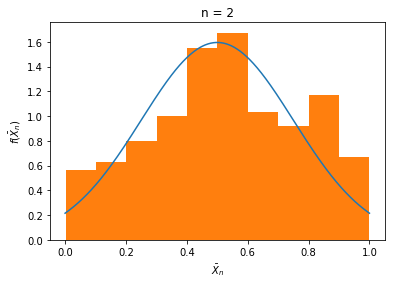

sigma( 5 ) = 0.16


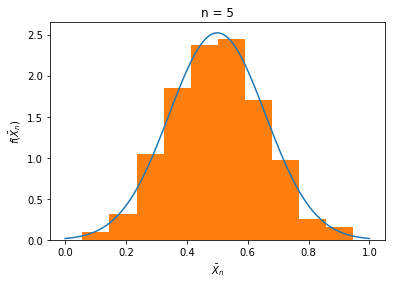

sigma( 10 ) = 0.11


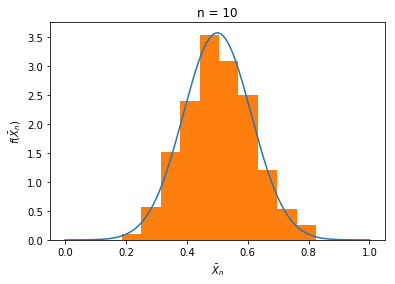

sigma( 50 ) = 0.05


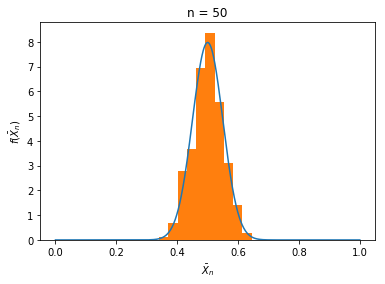

sigma( 100 ) = 0.04


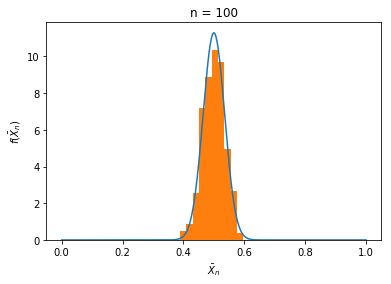

In [8]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [2, 5, 10, 50, 100]:
    generate_pdf(n)

## Опишите разницу между полученными распределениями при различных значениях $n$
Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом $n$?

__Вывод__: с ростом объема выборки $n$, распределение выборочных средних приближается к нормальному распределению. При малых $n$ распределение несимметрично, но все же похоже на нормальное, но уже при $n >=$ 50 распределение выборочных средних уже соответсвует нормальному. Также стоит отметить, что с ростом $n$ уменьшается $\sigma$ выборочных средних.

_Ilia Koniushok 30.07.2019_